In [16]:
import subprocess
import os

# Compile the C++ code
compile_command = "g++ -o rw_program rw-CO22BTECH11006.cpp -lpthread"
subprocess.run(compile_command, shell=True, check=True)

# Initialize variables to sum times
sum_avg_time_writers = 0
sum_avg_time_readers = 0
sum_worst_time_writers = 0
sum_worst_time_readers = 0

# Number of runs
runs = 5

# Execute the program multiple times and read the output
for _ in range(runs):
    # Run the compiled program
    subprocess.run("./rw_program", shell=True, check=True)

    # Read the output from RW-Average_time.txt
    with open("../Output Files/RW-Average_time.txt", "r") as file:
        lines = file.readlines()
        avg_time_writers = float(lines[0].strip().split(': ')[1].split(' ')[0])
        avg_time_readers = float(lines[1].strip().split(': ')[1].split(' ')[0])
        worst_time_writers = float(lines[2].strip().split(': ')[1].split(' ')[0])
        worst_time_readers = float(lines[3].strip().split(': ')[1].split(' ')[0])

        # Sum up the times for averaging later
        sum_avg_time_writers += avg_time_writers
        sum_avg_time_readers += avg_time_readers
        sum_worst_time_writers += worst_time_writers
        sum_worst_time_readers += worst_time_readers

# Calculate averages
avg_avg_time_writers = sum_avg_time_writers / runs
avg_avg_time_readers = sum_avg_time_readers / runs
avg_worst_time_writers = sum_worst_time_writers / runs
avg_worst_time_readers = sum_worst_time_readers / runs

# Display the results
print(f"Writer Pref: Average(writer) {runs} runs: {avg_avg_time_writers} seconds")
print(f"Writer Pref: Average(reader) {runs} runs: {avg_avg_time_readers} seconds")
print(f"Writer Pref: Worst(writer) {runs} runs: {avg_worst_time_writers} seconds")
print(f"Writer Pref: Worst(reader) {runs} runs: {avg_worst_time_readers} seconds")

executable_path = "rw_program"
if os.path.exists(executable_path):
    os.remove(executable_path)
    # print(f"Executable '{executable_path}' has been deleted.")
else:
    print(f"Executable '{executable_path}' not found or already deleted.")

Writer Pref: Average(writer) 5 runs: 0.00039960000000000006 seconds
Writer Pref: Average(reader) 5 runs: 0.0007413999999999999 seconds
Writer Pref: Worst(writer) 5 runs: 0.0022572 seconds
Writer Pref: Worst(reader) 5 runs: 0.0061262 seconds


In [21]:
import subprocess
import os

# Compile the C++ code
compile_command = "g++ -o rw_program frw-CO22BTECH11006.cpp -lpthread"
subprocess.run(compile_command, shell=True, check=True)

# Initialize variables to sum times
sum_avg_time_writers = 0
sum_avg_time_readers = 0
sum_worst_time_writers = 0
sum_worst_time_readers = 0

# Number of runs
runs = 5

# Execute the program multiple times and read the output
for _ in range(runs):
    # Run the compiled program
    subprocess.run("./rw_program", shell=True, check=True)

    # Read the output from RW-Average_time.txt
    with open("../Output Files/FairRW-Average_time.txt", "r") as file:
        lines = file.readlines()
        avg_time_writers = float(lines[0].strip().split(': ')[1].split(' ')[0])
        avg_time_readers = float(lines[1].strip().split(': ')[1].split(' ')[0])
        worst_time_writers = float(lines[2].strip().split(': ')[1].split(' ')[0])
        worst_time_readers = float(lines[3].strip().split(': ')[1].split(' ')[0])

        # Sum up the times for averaging later
        sum_avg_time_writers += avg_time_writers
        sum_avg_time_readers += avg_time_readers
        sum_worst_time_writers += worst_time_writers
        sum_worst_time_readers += worst_time_readers

# Calculate averages
avg_avg_time_writers = sum_avg_time_writers / runs
avg_avg_time_readers = sum_avg_time_readers / runs
avg_worst_time_writers = sum_worst_time_writers / runs
avg_worst_time_readers = sum_worst_time_readers / runs

# Display the results
print(f"Fair rw: Average(writer) {runs} runs: {avg_avg_time_writers} seconds")
print(f"Fair rw: Average(reader) {runs} runs: {avg_avg_time_readers} seconds")
print(f"Fair rw: Worst(writer) {runs} runs: {avg_worst_time_writers} seconds")
print(f"Fair rw: Worst(reader) {runs} runs: {avg_worst_time_readers} seconds")

executable_path = "rw_program"
if os.path.exists(executable_path):
    os.remove(executable_path)
    # print(f"Executable '{executable_path}' has been deleted.")
else:
    print(f"Executable '{executable_path}' not found or already deleted.")

Fair rw: Average(writer) 5 runs: 0.000999 seconds
Fair rw: Average(reader) 5 runs: 0.000977 seconds
Fair rw: Worst(writer) 5 runs: 0.0033131999999999997 seconds
Fair rw: Worst(reader) 5 runs: 0.004054 seconds


In [64]:
#WRITER PREFERANCE EXP1

import pandas as pd
import subprocess
import os

def write_input_file(nw, nr, kw, kr, muCS, muRem, file_path="../Input Files/input.txt"):
    with open(file_path, "w") as file:
        file.write(f"{nw} {nr} {kw} {kr} {muCS} {muRem}\n")

compile_command = "g++ -o rw_program rw-CO22BTECH11006.cpp -lpthread"
subprocess.run(compile_command, shell=True, check=True)

nw, kr, kw, muCS, muRem, runs = 10, 10, 10, 10, 5, 5

results_writerpref_df = pd.DataFrame()

for nr in range(1, 22, 5):
    sums = {'Avg Time Writers (ms)': 0, 'Avg Time Readers (ms)': 0,
            'Worst Time Writers (ms)': 0, 'Worst Time Readers (ms)': 0}
    
    write_input_file(nw, nr, kw, kr, muCS, muRem)

    for _ in range(runs):
        subprocess.run("./rw_program", shell=True, check=True)
        with open("../Output Files/RW-Average_time.txt", "r") as file:
            lines = file.readlines()
            values = [float(line.split(": ")[1].split(" ")[0]) * 1000 for line in lines]
            keys = list(sums.keys())
            for k, v in zip(keys, values):
                sums[k] += v

    results_writerpref_df = pd.concat([results_writerpref_df, pd.DataFrame({
        'nr': [nr],
        **{k: v / runs for k, v in sums.items()}
    })], ignore_index=True)

executable_path = "rw_program"
os.remove(executable_path) if os.path.exists(executable_path) else None

print("Writer Preferance : Exp1")
results_writerpref_df


Writer Preferance : Exp1


,nr,Avg Time Writers (ms),Avg Time Readers (ms),Worst Time Writers (ms),Worst Time Readers (ms)
0,1,0.7116,0.7988,1.8118,7.9158
1,6,0.7186,0.8214,1.5716,8.4316
2,11,0.6844,0.8110,1.4194,8.2724
3,16,0.7176,0.8168,1.8412,8.5054
4,21,0.7342,0.8238,1.9680,8.6310


In [65]:
# Fair RW Exp 1

import pandas as pd
import subprocess
import os

def write_input_file(nw, nr, kw, kr, muCS, muRem, file_path="../Input Files/input.txt"):
    with open(file_path, "w") as file:
        file.write(f"{nw} {nr} {kw} {kr} {muCS} {muRem}\n")

compile_command = "g++ -o rw_program frw-CO22BTECH11006.cpp -lpthread"
subprocess.run(compile_command, shell=True, check=True)

nw, kr, kw, muCS, muRem, runs = 10, 10, 10, 10, 5, 5

results_fair_df = pd.DataFrame()

for nr in range(1, 22, 5):
    sums = {'Avg Time Writers (ms)': 0, 'Avg Time Readers (ms)': 0,
            'Worst Time Writers (ms)': 0, 'Worst Time Readers (ms)': 0}
    
    write_input_file(nw, nr, kw, kr, muCS, muRem)

    for _ in range(runs):
        subprocess.run("./rw_program", shell=True, check=True)
        with open("../Output Files/FairRW-Average_time.txt", "r") as file:
            lines = file.readlines()
            values = [float(line.split(": ")[1].split(" ")[0]) * 1000 for line in lines]
            keys = list(sums.keys())
            for k, v in zip(keys, values):
                sums[k] += v

    results_fair_df = pd.concat([results_fair_df, pd.DataFrame({
        'nr': [nr],
        **{k: v / runs for k, v in sums.items()}
    })], ignore_index=True)

executable_path = "rw_program"
os.remove(executable_path) if os.path.exists(executable_path) else None

print("Fair RW: Exp1")
results_fair_df


Fair RW: Exp1


,nr,Avg Time Writers (ms),Avg Time Readers (ms),Worst Time Writers (ms),Worst Time Readers (ms)
0,1,0.6718,0.6594,1.0092,0.8368
1,6,1.1076,1.1118,1.8494,1.6544
2,11,1.2486,1.1900,2.1520,1.8616
3,16,1.7042,1.6570,5.1020,4.8740
4,21,2.1042,1.8902,3.7546,3.9244


Experiment 1


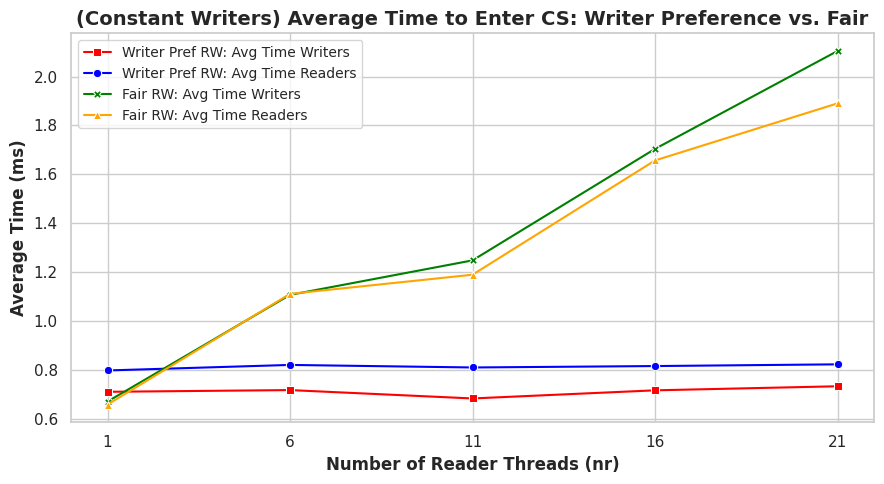

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming rw_df and fair_rw_df are your DataFrames for Writer Preference and Fair respectively
# Here's how you might create sample DataFrames for illustration; replace these with your actual DataFrames
avg_times_rw_df = results_writerpref_df[['nr', 'Avg Time Writers (ms)', 'Avg Time Readers (ms)']]

avg_times_fair_rw_df = results_fair_df[['nr', 'Avg Time Writers (ms)', 'Avg Time Readers (ms)']]

# Plot configuration
plt.figure(figsize=(9, 5))  # Decreased plot size
# sns.set(style="whitegrid")

# Plotting the average time for readers and writers for both algorithms with updated aesthetics
sns.lineplot(x='nr', y='Avg Time Writers (ms)', data=avg_times_rw_df, marker='s', label='Writer Pref RW: Avg Time Writers', color='red', markersize=6)
sns.lineplot(x='nr', y='Avg Time Readers (ms)', data=avg_times_rw_df, marker='o', label='Writer Pref RW: Avg Time Readers', color='blue', markersize=6)
sns.lineplot(x='nr', y='Avg Time Writers (ms)', data=avg_times_fair_rw_df, marker='X', label='Fair RW: Avg Time Writers', color='green', markersize=6)
sns.lineplot(x='nr', y='Avg Time Readers (ms)', data=avg_times_fair_rw_df, marker='^', label='Fair RW: Avg Time Readers', color='orange', markersize=6)

# Enhancing the plot
plt.title('(Constant Writers) Average Time to Enter CS: Writer Preference vs. Fair', fontsize=14,fontweight='bold')
plt.xlabel('Number of Reader Threads (nr)', fontsize=12,fontweight='bold')
plt.ylabel('Average Time (ms)', fontsize=12,fontweight='bold')
plt.xticks(avg_times_rw_df['nr'])  # Ensure all x-ticks are shown based on your dataset
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()

print("Experiment 1")
# Show plot
plt.show()


Experiment 3


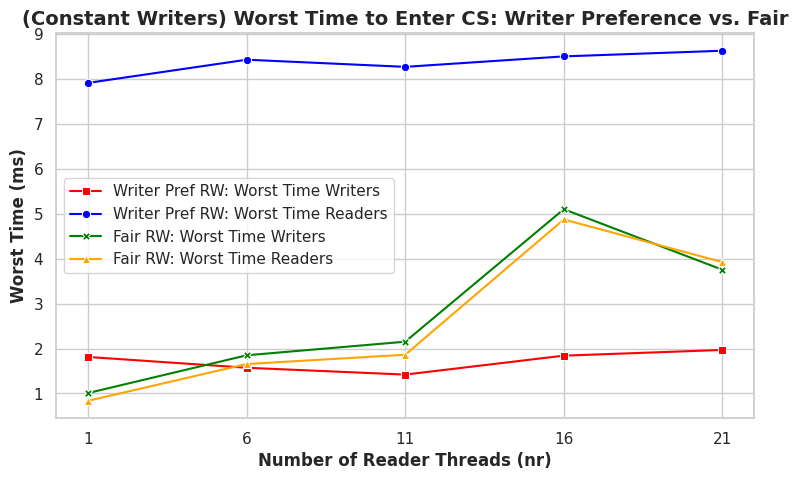

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming rw_df and fair_rw_df are your DataFrames for Writer Preference and Fair respectively
# Here's how you might create sample DataFrames for illustration; replace these with your actual DataFrames
worst_times_rw_df = results_writerpref_df[['nr', 'Worst Time Writers (ms)', 'Worst Time Readers (ms)']]

worst_times_fair_rw_df = results_fair_df[['nr', 'Worst Time Writers (ms)', 'Worst Time Readers (ms)']]

# Plot configuration
plt.figure(figsize=(9, 5))  # Decreased plot size
# sns.set(style="whitegrid")

# Plotting the Worst time for readers and writers for both algorithms with updated aesthetics
sns.lineplot(x='nr', y='Worst Time Writers (ms)', data=worst_times_rw_df, marker='s', label='Writer Pref RW: Worst Time Writers', color='red', markersize=6)
sns.lineplot(x='nr', y='Worst Time Readers (ms)', data=worst_times_rw_df, marker='o', label='Writer Pref RW: Worst Time Readers', color='blue', markersize=6)
sns.lineplot(x='nr', y='Worst Time Writers (ms)', data=worst_times_fair_rw_df, marker='X', label='Fair RW: Worst Time Writers', color='green', markersize=6)
sns.lineplot(x='nr', y='Worst Time Readers (ms)', data=worst_times_fair_rw_df, marker='^', label='Fair RW: Worst Time Readers', color='orange', markersize=6)

# Enhancing the plot
plt.title('(Constant Writers) Worst Time to Enter CS: Writer Preference vs. Fair', fontsize=14,fontweight='bold')
plt.xlabel('Number of Reader Threads (nr)', fontsize=12,fontweight='bold')
plt.ylabel('Worst Time (ms)', fontsize=12,fontweight='bold')
plt.xticks(worst_times_rw_df['nr'])  # Ensure all x-ticks are shown based on your dataset

# Positioning the legend outside the plot
plt.legend(loc='center left', fontsize=11)

print("Experiment 3")
# Show plot
plt.show()


In [93]:
## Writer Pref - Exp2 - Constant Readers

import pandas as pd
import subprocess
import os

def write_input_file(nw, nr, kw, kr, muCS, muRem, file_path="../Input Files/input.txt"):
    with open(file_path, "w") as file:
        file.write(f"{nw} {nr} {kw} {kr} {muCS} {muRem}\n")

compile_command = "g++ -o rw_program rw-CO22BTECH11006.cpp -lpthread"
subprocess.run(compile_command, shell=True, check=True)

# For this experiment, nr is constant at 10, and nw varies.
nr, kr, kw, muCS, muRem, runs = 10, 10, 10, 10, 5, 5

results_writerpref_constantreaders_df = pd.DataFrame()

for nw in range(1, 22, 5):
    sums = {'Avg Time Writers (ms)': 0, 'Avg Time Readers (ms)': 0,
            'Worst Time Writers (ms)': 0, 'Worst Time Readers (ms)': 0}
    
    write_input_file(nw, nr, kw, kr, muCS, muRem)

    for _ in range(runs):
        subprocess.run("./rw_program", shell=True, check=True)
        with open("../Output Files/RW-Average_time.txt", "r") as file:
            lines = file.readlines()
            values = [float(line.split(": ")[1].split(" ")[0]) * 1000 for line in lines]  # Convert seconds to milliseconds
            keys = list(sums.keys())
            for k, v in zip(keys, values):
                sums[k] += v

    results_writerpref_constantreaders_df = pd.concat([results_writerpref_constantreaders_df, pd.DataFrame({
        'nw': [nw],  # Changed from 'nr' to 'nw' to reflect varying number of writers
        **{k: v / runs for k, v in sums.items()}
    })], ignore_index=True)

executable_path = "rw_program"
os.remove(executable_path) if os.path.exists(executable_path) else None

print("Constant Readers : Exp1")
results_writerpref_constantreaders_df


Constant Readers : Exp1


,nw,Avg Time Writers (ms),Avg Time Readers (ms),Worst Time Writers (ms),Worst Time Readers (ms)
0,1,0.2450,0.2996,0.3930,0.7200
1,6,0.4130,0.5220,1.3844,5.5116
2,11,0.7300,0.8652,1.2856,8.6904
3,16,1.0982,1.2264,1.6466,12.3084
4,21,1.5384,1.6562,2.6840,16.6582


In [94]:
## Writer Pref - Exp2 - Constant Readers

import pandas as pd
import subprocess
import os

def write_input_file(nw, nr, kw, kr, muCS, muRem, file_path="../Input Files/input.txt"):
    with open(file_path, "w") as file:
        file.write(f"{nw} {nr} {kw} {kr} {muCS} {muRem}\n")

compile_command = "g++ -o rw_program frw-CO22BTECH11006.cpp -lpthread"
subprocess.run(compile_command, shell=True, check=True)

# For this experiment, nr is constant at 10, and nw varies.
nr, kr, kw, muCS, muRem, runs = 10, 10, 10, 10, 5, 5

results_fair_constantreaders_df = pd.DataFrame()

for nw in range(1, 22, 5):
    sums = {'Avg Time Writers (ms)': 0, 'Avg Time Readers (ms)': 0,
            'Worst Time Writers (ms)': 0, 'Worst Time Readers (ms)': 0}
    
    write_input_file(nw, nr, kw, kr, muCS, muRem)

    for _ in range(runs):
        subprocess.run("./rw_program", shell=True, check=True)
        with open("../Output Files/FairRW-Average_time.txt", "r") as file:
            lines = file.readlines()
            values = [float(line.split(": ")[1].split(" ")[0]) * 1000 for line in lines]  # Convert seconds to milliseconds
            keys = list(sums.keys())
            for k, v in zip(keys, values):
                sums[k] += v

    results_fair_constantreaders_df = pd.concat([results_fair_constantreaders_df, pd.DataFrame({
        'nw': [nw],  # Changed from 'nr' to 'nw' to reflect varying number of writers
        **{k: v / runs for k, v in sums.items()}
    })], ignore_index=True)

executable_path = "rw_program"
os.remove(executable_path) if os.path.exists(executable_path) else None

print("Constant Readers : Exp1")
results_fair_constantreaders_df


Constant Readers : Exp1


,nw,Avg Time Writers (ms),Avg Time Readers (ms),Worst Time Writers (ms),Worst Time Readers (ms)
0,1,0.2088,0.2622,0.3382,0.5458
1,6,0.9102,0.8574,1.4434,1.4312
2,11,1.3012,1.2258,2.4524,2.2346
3,16,1.7404,1.6494,3.8146,2.3646
4,21,2.3688,2.2704,4.9932,3.4758


Experiment 2


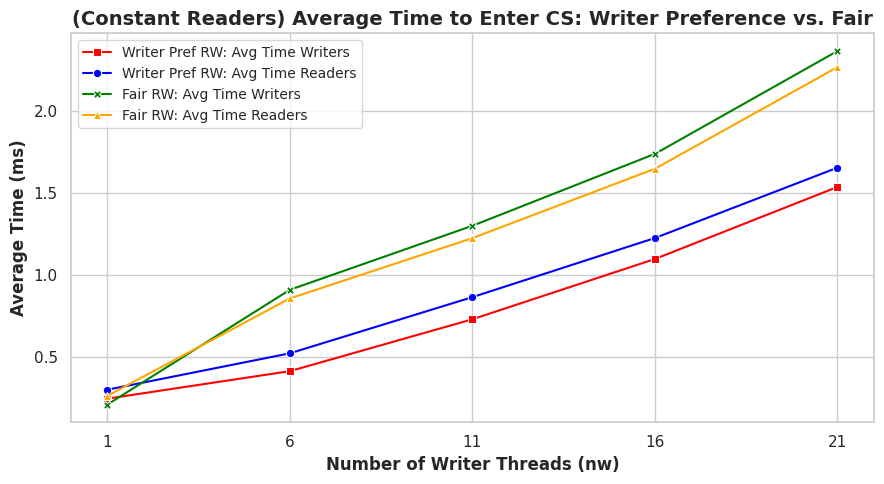

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming rw_df and fair_rw_df are your DataFrames for Writer Preference and Fair respectively
# Here's how you might create sample DataFrames for illustration; replace these with your actual DataFrames
avg_times_rw_df_constand_readers = results_writerpref_constantreaders_df[['nw', 'Avg Time Writers (ms)', 'Avg Time Readers (ms)']]

avg_times_fair_rw_df_constantreaders = results_fair_constantreaders_df[['nw', 'Avg Time Writers (ms)', 'Avg Time Readers (ms)']]

# Plot configuration
plt.figure(figsize=(9, 5))  # Decreased plot size
# sns.set(style="whitegrid")

# Plotting the average time for readers and writers for both algorithms with updated aesthetics
sns.lineplot(x='nw', y='Avg Time Writers (ms)', data=avg_times_rw_df_constand_readers, marker='s', label='Writer Pref RW: Avg Time Writers', color='red', markersize=6)
sns.lineplot(x='nw', y='Avg Time Readers (ms)', data=avg_times_rw_df_constand_readers, marker='o', label='Writer Pref RW: Avg Time Readers', color='blue', markersize=6)
sns.lineplot(x='nw', y='Avg Time Writers (ms)', data=avg_times_fair_rw_df_constantreaders, marker='X', label='Fair RW: Avg Time Writers', color='green', markersize=6)
sns.lineplot(x='nw', y='Avg Time Readers (ms)', data=avg_times_fair_rw_df_constantreaders, marker='^', label='Fair RW: Avg Time Readers', color='orange', markersize=6)

# Enhancing the plot
plt.title('(Constant Readers) Average Time to Enter CS: Writer Preference vs. Fair', fontsize=14,fontweight='bold')
plt.xlabel('Number of Writer Threads (nw)', fontsize=12,fontweight='bold')
plt.ylabel('Average Time (ms)', fontsize=12,fontweight='bold')
plt.xticks(avg_times_rw_df_constand_readers['nw'])  # Ensure all x-ticks are shown based on your dataset
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()

print("Experiment 2")
# Show plot
plt.show()


Experiment 4


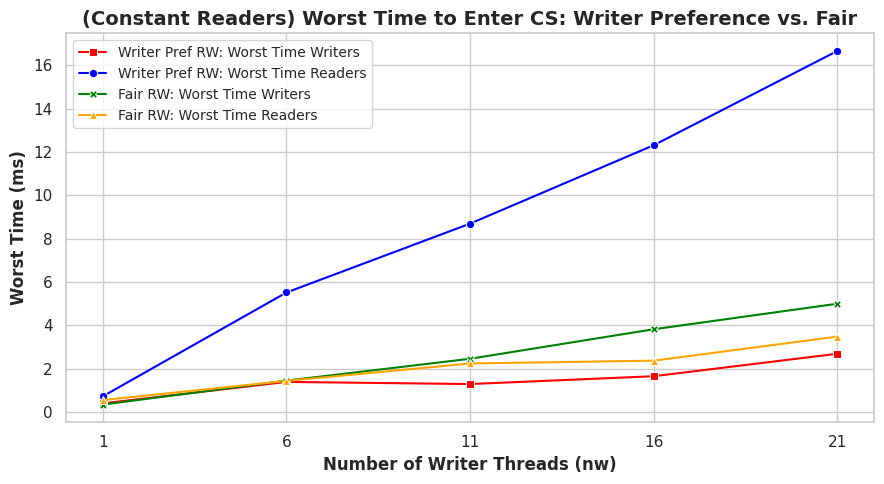

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming rw_df and fair_rw_df are your DataFrames for Writer Preference and Fair respectively
# Here's how you might create sample DataFrames for illustration; replace these with your actual DataFrames
worst_times_rw_df_constand_readers = results_writerpref_constantreaders_df[['nw', 'Worst Time Writers (ms)', 'Worst Time Readers (ms)']]

worst_times_fair_rw_df_constantreaders = results_fair_constantreaders_df[['nw', 'Worst Time Writers (ms)', 'Worst Time Readers (ms)']]

# Plot configuration
plt.figure(figsize=(9, 5))  # Decreased plot size
# sns.set(style="whitegrid")

# Plotting the Worst time for readers and writers for both algorithms with updated aesthetics
sns.lineplot(x='nw', y='Worst Time Writers (ms)', data=worst_times_rw_df_constand_readers, marker='s', label='Writer Pref RW: Worst Time Writers', color='red', markersize=6)
sns.lineplot(x='nw', y='Worst Time Readers (ms)', data=worst_times_rw_df_constand_readers, marker='o', label='Writer Pref RW: Worst Time Readers', color='blue', markersize=6)
sns.lineplot(x='nw', y='Worst Time Writers (ms)', data=worst_times_fair_rw_df_constantreaders, marker='X', label='Fair RW: Worst Time Writers', color='green', markersize=6)
sns.lineplot(x='nw', y='Worst Time Readers (ms)', data=worst_times_fair_rw_df_constantreaders, marker='^', label='Fair RW: Worst Time Readers', color='orange', markersize=6)

# Enhancing the plot
plt.title('(Constant Readers) Worst Time to Enter CS: Writer Preference vs. Fair', fontsize=14,fontweight='bold')
plt.xlabel('Number of Writer Threads (nw)', fontsize=12,fontweight='bold')
plt.ylabel('Worst Time (ms)', fontsize=12,fontweight='bold')
plt.xticks(worst_times_rw_df_constand_readers['nw'])  # Ensure all x-ticks are shown based on your dataset
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()

print("Experiment 4")
# Show plot
plt.show()
